# Gabi tester datavisualisering 

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
#import seaborn as sns
#sns.set()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
import numpy as np

In [ ]:
def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 11
    mpl.rcParams["figure.figsize"] = (7,2.5)
    mpl.rcParams["figure.dpi"] = 200
    # mpl.rcParams["lines.linewidth"] = 1
setup_mpl()

In [2]:
dfs = pd.read_csv("df_standardized_score.csv")
dfs = dfs[dfs.STRATUM != "0"] 

In [3]:
#Start here and load the dataframe
df = pd.read_csv("dropped_col_df.csv")
df = df[df.STRATUM != "0"] #0 corresponds to nan, i.e. removing nans

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12397 entries, 0 to 12410
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        12397 non-null  int64 
 1   COD_S11           12397 non-null  object
 2   GENDER            12397 non-null  object
 3   EDU_FATHER        12397 non-null  object
 4   EDU_MOTHER        12397 non-null  object
 5   OCC_FATHER        12397 non-null  object
 6   OCC_MOTHER        12397 non-null  object
 7   STRATUM           12397 non-null  object
 8   SISBEN            12397 non-null  object
 9   PEOPLE_HOUSE      12397 non-null  object
 10  REVENUE           12397 non-null  object
 11  JOB               12397 non-null  object
 12  SCHOOL_NAME       12397 non-null  object
 13  SCHOOL_NAT        12397 non-null  object
 14  SCHOOL_TYPE       12397 non-null  object
 15  MAT_S11           12397 non-null  int64 
 16  CR_S11            12397 non-null  int64 
 17  CC_S11      

In [5]:
df.head()

,Unnamed: 0,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,REVENUE,JOB,SCHOOL_NAME,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,Cod_SPro,UNIVERSITY,ACADEMIC_PROGRAM,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
0,0,SB11201210000129,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,It is not classified by the SISBEN,Three,Between 1 and less than 2 LMMW,No,COL NUEVO CAMBRIDGE,PRIVATE,ACADEMIC,71,81,61,86,82,EK201830142293,UNIVERSIDAD DE SANTANDER - UDES-BUCARAMANGA,INDUSTRIAL ENGINEERING,71,93,71,93,79,181,180,91,5,4,2,2
1,1,SB11201210000137,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,It is not classified by the SISBEN,Three,10 or more LMMW,No,COL LA QUINTA DEL PUENTE,PRIVATE,ACADEMIC,83,75,66,100,88,EK201830002633,UNIVERSIDAD DE LOS ANDES-BOGOTÁ D.C.,INDUSTRIAL ENGINEERING,97,38,86,98,78,201,182,92,5,4,4,4
2,2,SB11201210005154,M,Not sure,Not sure,Independent,Home,Stratum 2,Level 2,Five,Between 1 and less than 2 LMMW,"Yes, 20 hours or more per week",CENT EDUC PAULO FREIRE ...,PRIVATE,ACADEMIC,52,49,38,46,42,EK201830196510,UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA UNA...,ELECTRONIC ENGINEERING,17,1,18,43,22,113,113,7,1,1,1,1
3,3,SB11201210007504,F,Not sure,Not sure,Other occupation,Independent,Stratum 2,It is not classified by the SISBEN,Three,Between 2 and less than 3 LMMW,No,LICEO ANDINO,PRIVATE,ACADEMIC,56,55,51,64,73,EK201830031665,UNIVERSIDAD CATOLICA DE PEREIRA-PEREIRA,INDUSTRIAL ENGINEERING,65,35,76,80,48,137,157,67,4,3,2,2
4,4,SB11201210007548,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,It is not classified by the SISBEN,One,Between 7 and less than 10 LMMW,No,LIC TALLER SAN MIGUEL,PRIVATE,ACADEMIC,80,65,76,85,92,EK201830130461,UNIVERSIDAD INDUSTRIAL DE SANTANDER-BUCARAMANGA,INDUSTRIAL ENGINEERING,94,94,98,100,71,189,198,98,5,4,4,2


In [6]:
df.SEL_IHE.value_counts()

2    7735
4    2692
1    1136
3     834
Name: SEL_IHE, dtype: int64

In [7]:
# Men and women college grades average histograms
# plt.figure(figsize=(8,6))
men = df[df.GENDER=='M'][['GENDER','COL_GRADE_AVG']]
women = df[df.GENDER=='F'][['GENDER','COL_GRADE_AVG']]
fig,ax = plt.subplots()
plt.hist([women.COL_GRADE_AVG, men.COL_GRADE_AVG], 31, histtype='barstacked', density=False, alpha=0.4, edgecolor='none', label=['Females','Males'])
#TODO legend added

plt.xlabel("Average grades in highschool", size=14)
plt.legend()
plt.ylabel("Count", size=14)
plt.title("College grades distributions of females and males")
plt.legend(loc='upper right')


KeyError: "['COL_GRADE_AVG'] not in index"

## Normalization of data

#### Average score generation

In [8]:
df["HI_GRADE_AVG"] = df[["CR_S11", "CC_S11", "ENG_S11"]].mean(axis=1)
df["COL_GRADE_AVG"] = df[["CR_PRO", "CC_PRO", "ENG_PRO"]].mean(axis=1)

#### Gender distribution

In [9]:
df[["GENDER", "HI_GRADE_AVG"]].groupby(["GENDER"]).mean()

,HI_GRADE_AVG
GENDER,
F,60.775462
M,61.329393


In [10]:
df[["GENDER", "HI_GRADE_AVG"]].groupby(["GENDER"]).mean()
df[["GENDER", "Unnamed: 0"]].groupby(["GENDER"]).count()

,Unnamed: 0
GENDER,
F,5037
M,7360


#### Socieconomic levels ("Stratum") distribution

In [11]:
df[["SEL", "STRATUM", "Unnamed: 0"]].groupby(["SEL","STRATUM"]).count()

Unnamed: 0
SEL STRATUM              
1   Stratum 1         837
    Stratum 2         923
    Stratum 3         326
    Stratum 4          40
    Stratum 5           3
    Stratum 6           6
2   Stratum 1         685
    Stratum 2        2038
    Stratum 3        1580
    Stratum 4         339
    Stratum 5          70
    Stratum 6          24
3   Stratum 1         104
    Stratum 2         458
    Stratum 3         676
    Stratum 4         171
    Stratum 5          66
    Stratum 6          13
4   Stratum 1          83
    Stratum 2         610
    Stratum 3        1463
    Stratum 4        1028
    Stratum 5         494
    Stratum 6         360

In [12]:
# Vi holder os til de klasser der er

strat_df = df[["STRATUM", "Unnamed: 0"]].groupby(["STRATUM"]).count()
strat_df["n_strat_ratio"] = strat_df["Unnamed: 0"].apply(lambda x: (x/(len(df))*100))
strat_df

,Unnamed: 0,n_strat_ratio
STRATUM,,
Stratum 1,1709,13.785593
Stratum 2,4029,32.499798
Stratum 3,4045,32.628862
Stratum 4,1578,12.728886
Stratum 5,633,5.106074
Stratum 6,403,3.250786


In [13]:
df[["STRATUM", "HI_GRADE_AVG"]].groupby(["STRATUM"]).mean()

,HI_GRADE_AVG
STRATUM,
Stratum 1,55.926078
Stratum 2,58.515678
Stratum 3,61.719819
Stratum 4,65.820659
Stratum 5,69.133228
Stratum 6,71.687345


#### Average both Gender and Socioeconomic level

In [14]:
df[["STRATUM","GENDER", "HI_GRADE_AVG"]].groupby(["STRATUM", "GENDER"]).mean()

HI_GRADE_AVG
STRATUM   GENDER              
Stratum 1 F          56.015603
          M          55.863214
Stratum 2 F          58.642539
          M          58.428232
Stratum 3 F          61.313714
          M          62.008887
Stratum 4 F          65.271875
          M          66.195096
Stratum 5 F          68.412766
          M          69.558626
Stratum 6 F          70.580153
          M          72.220588

#### Number of individuals by gender&socioeconomic level

In [15]:
df_gen_soc = df[["STRATUM","GENDER", "Unnamed: 0"]].groupby(["STRATUM", "GENDER"]).count()
df_gen_soc

Unnamed: 0
STRATUM   GENDER            
Stratum 1 F              705
          M             1004
Stratum 2 F             1644
          M             2385
Stratum 3 F             1682
          M             2363
Stratum 4 F              640
          M              938
Stratum 5 F              235
          M              398
Stratum 6 F              131
          M              272

In [16]:
#plot: stacked bar chart

In [17]:
df_gen_soc2 = df.groupby(["STRATUM", "GENDER"]).size().reset_index().pivot(columns='GENDER', index='STRATUM', values=0)
df_gen_soc2


GENDER,F,M
STRATUM,,
Stratum 1,705,1004
Stratum 2,1644,2385
Stratum 3,1682,2363
Stratum 4,640,938
Stratum 5,235,398
Stratum 6,131,272


Text(0.5, 0, 'Stratum')

<Figure size 360x240 with 0 Axes>

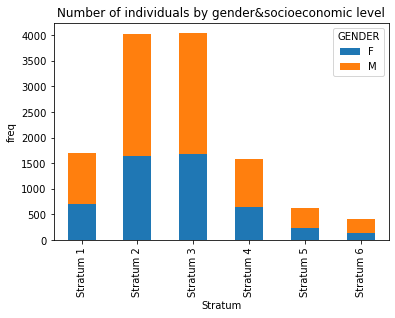

In [18]:
figure(figsize=(6, 4), dpi=60)
df_gen_soc2.plot(kind='bar', stacked=True)
plt.title("Number of individuals by gender&socioeconomic level")
plt.ylabel("freq")
plt.xlabel("Stratum")

### Distribution of grades by gender&socio-economic level (before and after college)

In [19]:
df.COL_GRADE_AVG

0        85.666667
1        74.000000
2        20.666667
3        63.666667
4        97.333333
           ...    
12406    81.333333
12407    31.333333
12408    86.333333
12409    46.333333
12410    88.333333
Name: COL_GRADE_AVG, Length: 12397, dtype: float64

In [20]:
df_gen_soc_hc = df[['HI_GRADE_AVG', 'COL_GRADE_AVG', 'GENDER', 'STRATUM']]
df_gen_soc_hc.head()

,HI_GRADE_AVG,COL_GRADE_AVG,GENDER,STRATUM
0,74.666667,85.666667,F,Stratum 4
1,76.333333,74.000000,F,Stratum 5
2,43.000000,20.666667,M,Stratum 2
3,59.666667,63.666667,F,Stratum 2
4,77.666667,97.333333,M,Stratum 4


In [21]:
df_use = df_gen_soc_hc.groupby(["STRATUM", "GENDER"]).mean()
df_use["DIFF"] = df_use["COL_GRADE_AVG"]-df_use["HI_GRADE_AVG"]
df_use.sort_index(ascending=False)

HI_GRADE_AVG  COL_GRADE_AVG      DIFF
STRATUM   GENDER                                       
Stratum 6 M          72.220588      79.688725  7.468137
          F          70.580153      77.870229  7.290076
Stratum 5 M          69.558626      77.118090  7.559464
          F          68.412766      74.090780  5.678014
Stratum 4 M          66.195096      72.585288  6.390192
          F          65.271875      71.417187  6.145313
Stratum 3 M          62.008887      65.600790  3.591903
          F          61.313714      63.858700  2.544986
Stratum 2 M          58.428232      58.774983  0.346751
          F          58.642539      58.285888 -0.356650
Stratum 1 M          55.863214      51.744024 -4.119190
          F          56.015603      51.877069 -4.138534

In [22]:
df_gen_soc_hc = df_gen_soc_hc.rename(columns = {"HI_GRADE_AVG":"HI", "COL_GRADE_AVG":"COL"})

Tjek denne side: https://www.simplypsychology.org/boxplots.html

In [23]:
# plot af badass boxplot

df_try = pd.melt(df_gen_soc_hc, id_vars=['GENDER', 'STRATUM'])
df_try = df_try.rename(columns={"variable":"Average_grade"})

b = sns.catplot(data=df_try, x='STRATUM', y='value', 
               hue='GENDER', col='Average_grade',
               kind='box', legend=True, order=["Stratum 1", "Stratum 2", "Stratum 3", "Stratum 4", "Stratum 5", "Stratum 6"])
b.fig.subplots_adjust(top=.8)
b.fig.suptitle('Boxplot of Average Grade Before and After College')


plt.show()

NameError: name 'sns' is not defined

### Matrix showing the Pearson correlation between grades (before), grades (after), gender, socio-economic level

In [24]:
df_F = df_try[df_try.GENDER =="F"]
df_M = df_try[df_try.GENDER =="M"]
df_F_HI = df_F[df_F.Average_grade =="HI"]
df_F_COL = df_F[df_F.Average_grade =="COL"]
df_M_HI = df_M[df_M.Average_grade =="HI"]
df_M_COL = df_M[df_M.Average_grade =="COL"]


In [25]:
def xdef(x,s):
    if x[0] == s:
        return x[1]
    else:
        return 0
    
# test = df_F_HI[["STRATUM", "value"]][:10].apply(lambda x: xdef, axis=1)

In [26]:
strats = ["Stratum 1", "Stratum 2", "Stratum 3", "Stratum 4", "Stratum 5", "Stratum 6"]
for s in strats:
    df_F_HI["df_F_HI_{}".format(s)] = df_F_HI[["STRATUM", "value"]].apply(lambda x: xdef(x,s), axis=1)
    df_F_COL["df_F_COL_{}".format(s)] = df_F_COL[["STRATUM", "value"]].apply(lambda x: xdef(x,s), axis=1)
    df_M_HI["df_M_HI_{}".format(s)] = df_M_HI[["STRATUM", "value"]].apply(lambda x: xdef(x,s), axis=1)
    df_M_COL["df_M_COL_{}".format(s)] = df_M_COL[["STRATUM", "value"]].apply(lambda x: xdef(x,s), axis=1)

    

/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_15286/2948714075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_F_HI["df_F_HI_{}".format(s)] = df_F_HI[["STRATUM", "value"]].apply(lambda x: xdef(x,s), axis=1)
/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_15286/2948714075.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_F_COL["df_F_COL_{}".format(s)] = df_F_COL[["STRATUM", "value"]].apply(lambda x: xdef(x,s), axis=1)
/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipyker

In [27]:
strats = ["Stratum 1", "Stratum 2", "Stratum 3", "Stratum 4", "Stratum 5", "Stratum 6"]
for s in strats:
    df_F_HI["df_F_HI_{}".format(s)] = df_F_HI[df_F_HI.STRATUM == s].value
    df_F_COL["df_F_COL_{}".format(s)] = df_F_COL[df_F_COL.STRATUM == s].value
    df_M_HI["df_M_HI_{}".format(s)] = df_M_HI[df_M_HI.STRATUM == s].value
    df_M_COL["df_M_COL_{}".format(s)] = df_M_COL[df_M_COL.STRATUM == s].value


/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_15286/3221656718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_F_HI["df_F_HI_{}".format(s)] = df_F_HI[df_F_HI.STRATUM == s].value
/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_15286/3221656718.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_F_COL["df_F_COL_{}".format(s)] = df_F_COL[df_F_COL.STRATUM == s].value
/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_15286/3221656718.py:5: SettingWithCopyWarning: 
A val

In [28]:
df_F_HI

,GENDER,STRATUM,Average_grade,value,df_F_HI_Stratum 1,df_F_HI_Stratum 2,df_F_HI_Stratum 3,df_F_HI_Stratum 4,df_F_HI_Stratum 5,df_F_HI_Stratum 6
0,F,Stratum 4,HI,74.666667,NaN,NaN,NaN,74.666667,NaN,NaN
1,F,Stratum 5,HI,76.333333,NaN,NaN,NaN,NaN,76.333333,NaN
3,F,Stratum 2,HI,59.666667,NaN,59.666667,NaN,NaN,NaN,NaN
5,F,Stratum 6,HI,66.333333,NaN,NaN,NaN,NaN,NaN,66.333333
7,F,Stratum 6,HI,74.666667,NaN,NaN,NaN,NaN,NaN,74.666667
...,...,...,...,...,...,...,...,...,...,...
12387,F,Stratum 3,HI,71.000000,NaN,NaN,71.000000,NaN,NaN,NaN
12388,F,Stratum 2,HI,62.333333,NaN,62.333333,NaN,NaN,NaN,NaN
12389,F,Stratum 3,HI,63.000000,NaN,NaN,63.000000,NaN,NaN,NaN
12390,F,Stratum 3,HI,79.666667,NaN,NaN,79.666667,NaN,NaN,NaN


In [29]:
strats = ["Stratum 1", "Stratum 2", "Stratum 3", "Stratum 4", "Stratum 5", "Stratum 6"]
for s in strats:
    df_F_HI["df_F_HI_{}".format(s)] = df_F_HI[["STRATUM", "value"]].apply(lambda x: xdef(x,s), axis=1)
    df_F_COL["df_F_COL_{}".format(s)] = df_F_COL[["STRATUM", "value"]].apply(lambda x: xdef(x,s), axis=1)
    df_M_HI["df_M_HI_{}".format(s)] = df_M_HI[["STRATUM", "value"]].apply(lambda x: xdef(x,s), axis=1)
    df_M_COL["df_M_COL_{}".format(s)] = df_M_COL[["STRATUM", "value"]].apply(lambda x: xdef(x,s), axis=1)

    
    
    

/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_15286/1369242704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_F_HI["df_F_HI_{}".format(s)] = df_F_HI[["STRATUM", "value"]].apply(lambda x: xdef(x,s), axis=1)
/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_15286/1369242704.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_F_COL["df_F_COL_{}".format(s)] = df_F_COL[["STRATUM", "value"]].apply(lambda x: xdef(x,s), axis=1)
/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipyker

In [30]:
df_F_COL

,GENDER,STRATUM,Average_grade,value,df_F_COL_Stratum 1,df_F_COL_Stratum 2,df_F_COL_Stratum 3,df_F_COL_Stratum 4,df_F_COL_Stratum 5,df_F_COL_Stratum 6
12397,F,Stratum 4,COL,85.666667,0.0,0.000000,0.000000,85.666667,0.0,0.000000
12398,F,Stratum 5,COL,74.000000,0.0,0.000000,0.000000,0.000000,74.0,0.000000
12400,F,Stratum 2,COL,63.666667,0.0,63.666667,0.000000,0.000000,0.0,0.000000
12402,F,Stratum 6,COL,48.000000,0.0,0.000000,0.000000,0.000000,0.0,48.000000
12404,F,Stratum 6,COL,92.333333,0.0,0.000000,0.000000,0.000000,0.0,92.333333
...,...,...,...,...,...,...,...,...,...,...
24784,F,Stratum 3,COL,41.000000,0.0,0.000000,41.000000,0.000000,0.0,0.000000
24785,F,Stratum 2,COL,89.666667,0.0,89.666667,0.000000,0.000000,0.0,0.000000
24786,F,Stratum 3,COL,87.333333,0.0,0.000000,87.333333,0.000000,0.0,0.000000
24787,F,Stratum 3,COL,79.000000,0.0,0.000000,79.000000,0.000000,0.0,0.000000


In [31]:
#Merging
result_df = pd.concat([df_F_HI.iloc[:,4:], df_F_COL.iloc[:,4:], df_M_HI.iloc[:,4:], df_M_COL.iloc[:,4:]], axis=1)

In [32]:
result_df

,df_F_HI_Stratum 1,df_F_HI_Stratum 2,df_F_HI_Stratum 3,df_F_HI_Stratum 4,df_F_HI_Stratum 5,df_F_HI_Stratum 6,df_F_COL_Stratum 1,df_F_COL_Stratum 2,df_F_COL_Stratum 3,df_F_COL_Stratum 4,df_F_COL_Stratum 5,df_F_COL_Stratum 6,df_M_HI_Stratum 1,df_M_HI_Stratum 2,df_M_HI_Stratum 3,df_M_HI_Stratum 4,df_M_HI_Stratum 5,df_M_HI_Stratum 6,df_M_COL_Stratum 1,df_M_COL_Stratum 2,df_M_COL_Stratum 3,df_M_COL_Stratum 4,df_M_COL_Stratum 5,df_M_COL_Stratum 6
0,0.0,0.000000,0.0,74.666667,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.000000,0.0,0.000000,76.333333,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,43.0,0.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,59.666667,0.0,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,77.666667,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,81.333333,0.000000,0.0,0.0,0.0
24790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,31.333333,0.000000,0.0,0.0,0.0
24791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,86.333333,0.000000,0.0,0.0,0.0
24792,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,46.333333,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
sns.heatmap(result_df.corr());

NameError: name 'sns' is not defined

### Split up pearson correlation:
between grades (before), grades (after), gender, socio-economic level

In [34]:
df_use = df_gen_soc_hc.copy()
df_use

,HI,COL,GENDER,STRATUM
0,74.666667,85.666667,F,Stratum 4
1,76.333333,74.000000,F,Stratum 5
2,43.000000,20.666667,M,Stratum 2
3,59.666667,63.666667,F,Stratum 2
4,77.666667,97.333333,M,Stratum 4
...,...,...,...,...
12406,73.333333,81.333333,M,Stratum 2
12407,57.000000,31.333333,M,Stratum 2
12408,67.333333,86.333333,M,Stratum 2
12409,61.666667,46.333333,F,Stratum 3


In [35]:
#new df with new cols 

df_F = df_use[df_use.GENDER == "F"]
df_M = df_use[df_use.GENDER == "M"]
df_M = df_M.rename(columns={"HI":"HI_M", "COL":"COL_M"})
df_F = df_F.rename(columns={"HI":"HI_F", "COL":"COL_F"})

df_F = df_F.reset_index(drop=True)
df_M = df_M.reset_index(drop=True)


df_F = df_F.drop(["GENDER", "STRATUM"], axis=1)
df_M = df_M.drop(["GENDER", "STRATUM"], axis=1)

In [36]:
# Merge the two dfs
df_FM = pd.concat([df_F,df_M], axis=1)

In [37]:
df_FM

,HI_F,COL_F,HI_M,COL_M
0,74.666667,85.666667,43.000000,20.666667
1,76.333333,74.000000,77.666667,97.333333
2,59.666667,63.666667,73.666667,50.000000
3,66.333333,48.000000,53.666667,34.333333
4,74.666667,92.333333,57.000000,48.666667
...,...,...,...,...
7355,NaN,NaN,69.000000,61.666667
7356,NaN,NaN,73.333333,81.333333
7357,NaN,NaN,57.000000,31.333333
7358,NaN,NaN,67.333333,86.333333


In [38]:
sns.heatmap(df_FM.corr(method="pearson"), vmin=0.0, vmax=1.0,  annot = True);

NameError: name 'sns' is not defined

USE: https://stackoverflow.com/questions/60731457/how-to-easily-group-values-to-improve-heatmap-visualization


### For startums

In [39]:
df_S1 = df_use[df_use.STRATUM == "Stratum 1"]
df_S2 = df_use[df_use.STRATUM == "Stratum 2"]
df_S3 = df_use[df_use.STRATUM == "Stratum 3"]
df_S4 = df_use[df_use.STRATUM == "Stratum 4"]
df_S5 = df_use[df_use.STRATUM == "Stratum 5"]
df_S6 = df_use[df_use.STRATUM == "Stratum 6"]


df_S1 = df_S1.rename(columns={"HI":"HI_S1", "COL":"COL_S1"})
df_S2 = df_S2.rename(columns={"HI":"HI_S2", "COL":"COL_S2"})
df_S3 = df_S3.rename(columns={"HI":"HI_S3", "COL":"COL_S3"})
df_S4 = df_S4.rename(columns={"HI":"HI_S4", "COL":"COL_S4"})
df_S5 = df_S5.rename(columns={"HI":"HI_S5", "COL":"COL_S5"})
df_S6 = df_S6.rename(columns={"HI":"HI_S6", "COL":"COL_S6"})


In [40]:
df_S1 = df_S1.reset_index(drop=True)
df_S2 = df_S2.reset_index(drop=True)
df_S3 = df_S3.reset_index(drop=True)
df_S4 = df_S4.reset_index(drop=True)
df_S5 = df_S5.reset_index(drop=True)
df_S6 = df_S6.reset_index(drop=True)


df_S1 = df_S1.drop(["GENDER", "STRATUM"], axis=1)
df_S2 = df_S2.drop(["GENDER", "STRATUM"], axis=1)
df_S3 = df_S3.drop(["GENDER", "STRATUM"], axis=1)
df_S4 = df_S4.drop(["GENDER", "STRATUM"], axis=1)
df_S5 = df_S5.drop(["GENDER", "STRATUM"], axis=1)
df_S6 = df_S6.drop(["GENDER", "STRATUM"], axis=1)


In [41]:
# Merge all the stratum dfs
df_St = pd.concat([df_S1, df_S2, df_S3, df_S4, df_S5 ,df_S6], axis=1)

In [42]:
figure(figsize=(12, 10), dpi=80)

sns.heatmap(df_St.corr(method="pearson"), vmin=0.0, vmax=1.0, annot = True);

NameError: name 'sns' is not defined

<Figure size 960x800 with 0 Axes>

In [43]:
sns.heatmap(df_use[["HI", "COL"]].corr(method="pearson"), vmin=0.0, vmax=1.0, annot = True);

NameError: name 'sns' is not defined

#### For each university's SEL_IHE,
plot distribution

In [44]:
df_group = df[["SEL_IHE", "CR_PRO", "CC_PRO", "ENG_PRO"]].groupby(["SEL_IHE"]).mean()

In [45]:
df_group.head()

,CR_PRO,CC_PRO,ENG_PRO
SEL_IHE,,,
1,54.940141,51.955106,51.164613
2,58.990562,56.049515,62.822107
3,64.613909,59.629496,72.786571
4,73.811664,71.184250,86.253715


#### Overall correlation, to see which data to look for

In [46]:
df['Cod_SPro'].nunique()

12381

In [47]:
df['SEL_IHE'].value_counts()

2    7735
4    2692
1    1136
3     834
Name: SEL_IHE, dtype: int64

In [48]:
figure(figsize=(8, 6), dpi=80)
sns.heatmap(df.corr());

NameError: name 'sns' is not defined

<Figure size 640x480 with 0 Axes>

## New correlation heatmap - Lauras version
Make pearson correlation of two columns. Create nested for loop to go through combinations of the four columns and add pearson array to 4x4 matrix. End with (16/2)-4 size heatmap by applying imshow().

Scipys pearson correlation has the output:  Pearson correlation coefficient and p-value for testing non-correlation.

## New correlations - our version
Point biserial: https://en.wikipedia.org/wiki/Point-biserial_correlation_coefficient
https://towardsdatascience.com/point-biserial-correlation-with-python-f7cd591bd3b1

In [49]:
dfs
dfs_use = pd.get_dummies(dfs,columns=['STRATUM'])
dfs_use = pd.get_dummies(dfs_use,columns=['GENDER'])

In [50]:
dfs_use

,Unnamed: 0,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin,STRATUM_Stratum_1,STRATUM_Stratum_2,STRATUM_Stratum_3,STRATUM_Stratum_4,STRATUM_Stratum_5,STRATUM_Stratum_6,GENDER_F,GENDER_M
0,0,2.016939,0.029131,1.412733,1.113281,0.407467,1.000257,0.995599,1.371666,1.208684,0,0,0,1,0,0,1,0
1,1,1.418487,0.523176,1.832378,-0.874678,0.924854,1.196373,0.484028,1.540112,1.208684,0,0,0,0,1,0,1,0
2,2,-1.174802,-2.243479,-1.384905,-2.212033,-1.420633,-0.960904,-1.854585,-1.828806,-0.827279,0,1,0,0,0,0,0,1
3,3,-0.576351,-0.958960,0.783264,-0.983113,0.579930,0.490355,0.030921,-0.144347,1.208684,0,1,0,0,0,0,1,0
4,4,0.421068,1.511268,2.112142,1.149426,1.338764,1.274820,1.507171,1.674869,-0.827279,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,12406,0.820036,0.918413,1.342792,0.318097,0.924854,0.764918,0.805587,1.236910,-0.827279,0,1,0,0,0,0,0,1
12407,12407,-0.376867,0.029131,-0.615555,-0.838534,-0.523829,-2.216048,-1.386863,-0.413860,-0.827279,0,1,0,0,0,0,0,1
12408,12408,0.820036,1.412458,-0.265850,0.932558,1.062824,0.529578,1.024832,0.630504,-0.827279,0,1,0,0,0,0,0,1
12409,12409,0.820036,0.325558,-0.685496,0.643400,-0.282382,-2.333717,-0.729128,0.057788,1.208684,0,0,1,0,0,0,1,0


In [51]:
# First with gender
#F=1, M=0

from scipy.stats import pointbiserialr

pbc = pointbiserialr(dfs_use.GENDER_F, dfs_use.HI_GRADE_AVG)
pbc[0]

-0.027502007174211328

From tutorial "with r=-0.22, "As gender increases test scores tend to decrease"
Going from male 0 to female 1 makes the scores to decrease. Easy to visualise as a plot. 

In [52]:
# Then with stratum 1-6:

#Question: Whether or not you are from Stratum x and what grade you have. 
pbc_1 = pointbiserialr(dfs_use.STRATUM_Stratum_1, dfs_use.HI_GRADE_AVG)
pbc_6 = pointbiserialr(dfs_use.STRATUM_Stratum_6, dfs_use.HI_GRADE_AVG)
print(pbc_1 , pbc_6)



PointbiserialrResult(correlation=-0.20931759434075234, pvalue=8.82170821695553e-123) PointbiserialrResult(correlation=0.19610112375814487, pvalue=1.0335153924832236e-107)


For Stratum 1...

### Correlation matrix

In [53]:
dfs_use.columns

Index(['Unnamed: 0', 'CR_S11', 'CC_S11', 'ENG_S11', 'CR_PRO', 'CC_PRO',
       'ENG_PRO', 'COL_GRADE_AVG', 'HI_GRADE_AVG', 'GENDER_bin',
       'STRATUM_Stratum_1', 'STRATUM_Stratum_2', 'STRATUM_Stratum_3',
       'STRATUM_Stratum_4', 'STRATUM_Stratum_5', 'STRATUM_Stratum_6',
       'GENDER_F', 'GENDER_M'],
      dtype='object')

In [54]:
# Columns to use 
dfs_use_pb = dfs_use[['COL_GRADE_AVG', 'HI_GRADE_AVG','STRATUM_Stratum_1', 'STRATUM_Stratum_2', 'STRATUM_Stratum_3',
       'STRATUM_Stratum_4', 'STRATUM_Stratum_5', 'STRATUM_Stratum_6','GENDER_F']]

# 3x6 matrix
corr_matrix = np.empty((6,3))
corr_matrix

array([[0.0e+000, 0.0e+000, 4.9e-324],
       [9.9e-324, 1.5e-323, 2.0e-323],
       [2.5e-323, 3.0e-323, 3.5e-323],
       [4.0e-323, 0.0e+000, 4.9e-324],
       [9.9e-324, 1.5e-323, 2.0e-323],
       [2.5e-323, 0.0e+000, 4.9e-324]])

In [55]:
corr_matrix = np.insert(corr_matrix,0, np.array([-0.19602852233575963, -0.20931759434075234, 0.005059217198143426]), axis=0)
corr_matrix

array([[-1.96028522e-001, -2.09317594e-001,  5.05921720e-003],
       [ 0.00000000e+000,  0.00000000e+000,  4.94065646e-324],
       [ 9.88131292e-324,  1.48219694e-323,  1.97626258e-323],
       [ 2.47032823e-323,  2.96439388e-323,  3.45845952e-323],
       [ 3.95252517e-323,  0.00000000e+000,  4.94065646e-324],
       [ 9.88131292e-324,  1.48219694e-323,  1.97626258e-323],
       [ 2.47032823e-323,  0.00000000e+000,  4.94065646e-324]])

In [56]:
np.insert(corr_matrix,1, np.array([-0.19602852233575963, -0.20931759434075234, 0.005059217198143426]), axis=0)

array([[-1.96028522e-001, -2.09317594e-001,  5.05921720e-003],
       [-1.96028522e-001, -2.09317594e-001,  5.05921720e-003],
       [ 0.00000000e+000,  0.00000000e+000,  4.94065646e-324],
       [ 9.88131292e-324,  1.48219694e-323,  1.97626258e-323],
       [ 2.47032823e-323,  2.96439388e-323,  3.45845952e-323],
       [ 3.95252517e-323,  0.00000000e+000,  4.94065646e-324],
       [ 9.88131292e-324,  1.48219694e-323,  1.97626258e-323],
       [ 2.47032823e-323,  0.00000000e+000,  4.94065646e-324]])

In [57]:
np.insert(corr_matrix,2, np.array([-0.19602852233575963, -0.20931759434075234, 0.005059217198143426]), axis=0)

array([[-1.96028522e-001, -2.09317594e-001,  5.05921720e-003],
       [ 0.00000000e+000,  0.00000000e+000,  4.94065646e-324],
       [-1.96028522e-001, -2.09317594e-001,  5.05921720e-003],
       [ 9.88131292e-324,  1.48219694e-323,  1.97626258e-323],
       [ 2.47032823e-323,  2.96439388e-323,  3.45845952e-323],
       [ 3.95252517e-323,  0.00000000e+000,  4.94065646e-324],
       [ 9.88131292e-324,  1.48219694e-323,  1.97626258e-323],
       [ 2.47032823e-323,  0.00000000e+000,  4.94065646e-324]])

In [58]:
dfs_use_pb

,COL_GRADE_AVG,HI_GRADE_AVG,STRATUM_Stratum_1,STRATUM_Stratum_2,STRATUM_Stratum_3,STRATUM_Stratum_4,STRATUM_Stratum_5,STRATUM_Stratum_6,GENDER_F
0,0.995599,1.371666,0,0,0,1,0,0,1
1,0.484028,1.540112,0,0,0,0,1,0,1
2,-1.854585,-1.828806,0,1,0,0,0,0,0
3,0.030921,-0.144347,0,1,0,0,0,0,1
4,1.507171,1.674869,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
12406,0.805587,1.236910,0,1,0,0,0,0,0
12407,-1.386863,-0.413860,0,1,0,0,0,0,0
12408,1.024832,0.630504,0,1,0,0,0,0,0
12409,-0.729128,0.057788,0,0,1,0,0,0,1


In [59]:
arrcor = []
for i, col1 in enumerate(dfs_use_pb[['STRATUM_Stratum_1', 'STRATUM_Stratum_2', 'STRATUM_Stratum_3',
       'STRATUM_Stratum_4', 'STRATUM_Stratum_5', 'STRATUM_Stratum_6']]): 
    x = dfs_use_pb["{}".format(col1)]
    a_array = [] 
    for col2 in dfs_use_pb[['GENDER_F', 'COL_GRADE_AVG', 'HI_GRADE_AVG']]:
        y = dfs_use_pb["{}".format(col2)]
        a_array.append(pointbiserialr(x, y)[0])
    arrcor.append(a_array)
    
#y: st1-st6, x: col-gender_f

In [60]:
#Create matrix:
corr_matrix = np.array(arrcor).reshape(6,3)

In [61]:
# Append / Insert 3 extra rows of correlations between Gender, HI, COL

#gen x col
a1 = pointbiserialr(dfs_use_pb.COL_GRADE_AVG, dfs_use_pb.GENDER_F)[0]

#gen x hi
a2 = pointbiserialr(dfs_use_pb.HI_GRADE_AVG, dfs_use_pb.GENDER_F)[0]

#col x hi
a3 = pointbiserialr(dfs_use_pb.HI_GRADE_AVG, dfs_use_pb.COL_GRADE_AVG)[0]


corr_matrix = np.insert(corr_matrix, 0, np.array([a2, a3, 0]), axis=0)
corr_matrix = np.insert(corr_matrix, 0, np.array([a1,0,0]), axis=0)



In [62]:
corr_matrix

array([[-2.94511008e-02,  0.00000000e+00,  0.00000000e+00],
       [-2.75020072e-02,  7.60872586e-01,  0.00000000e+00],
       [ 5.05921720e-03, -1.96028522e-01, -2.09317594e-01],
       [ 2.44939296e-03, -1.33939580e-01, -1.81577015e-01],
       [ 1.34809350e-02,  5.79806876e-02,  4.32998838e-02],
       [-5.68651617e-04,  1.53002922e-01,  1.82080903e-01],
       [-1.65587439e-02,  1.32431573e-01,  1.88269734e-01],
       [-3.03224231e-02,  1.29598290e-01,  1.96101124e-01]])

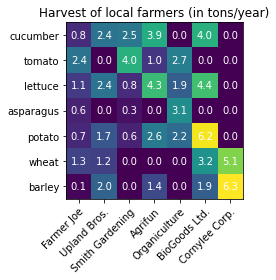

In [63]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()


NameError: name 'x_label_list' is not defined

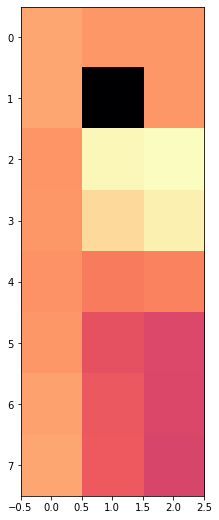

In [64]:

fig, ax = plt.subplots(figsize=(4.5, 9))
im = ax.imshow(corr_matrix,  cmap="magma_r" )


# We want to show all ticks...
ax.set_xticks(np.arange(len(x_label_list)))
ax.set_yticks(np.arange(len(y_label_list)))
# ... and label them with the respective list entries
x_label_list = ['COL', 'HI', 'GEN']
y_label_list = ['HI', 'GEN', 'st1', 'st2', 'st3', 'st4', 'st5', 'st6']
ax.set_xticklabels(x_label_list)
ax.set_yticklabels(y_label_list)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(y_label_list)):
    for j in range(len(x_label_list)):
        text = ax.text(j, i, "{:.2f}".format(corr_matrix[i, j]),
                       ha="center", va="center", color="w")
        
cbar = fig.colorbar(im, ax=ax, fraction=0.128, pad=0.04)
cbar.ax.set_ylabel("correlation coef.", rotation=-90, va="bottom")

ax.set_title("Correlation heatmap of stratum, gender and grades")
fig.tight_layout()
plt.show()

In [65]:
import numpy as np
np.array([True, False, False]) + 0 

array([1, 0, 0])

NameError: name 'x_label_list' is not defined

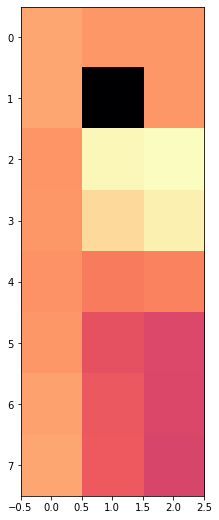

In [66]:
fig, ax = plt.subplots(figsize=(4.5, 9))
im = ax.imshow(corr_matrix,  cmap="magma_r" )


# We want to show all ticks...
ax.set_xticks(np.arange(len(x_label_list)))
ax.set_yticks(np.arange(len(y_label_list)))
# ... and label them with the respective list entries
x_label_list = ['COL', 'HI', 'GEN']
y_label_list = ['HI', 'GEN', 'st1', 'st2', 'st3', 'st4', 'st5', 'st6']
ax.set_xticklabels(x_label_list)
ax.set_yticklabels(y_label_list)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(y_label_list)):
    for j in range(len(x_label_list)):
        text = ax.text(j, i, "{:.2f}".format(corr_matrix[i, j]),
                       ha="center", va="center", color="w")
        
cbar = fig.colorbar(im, ax=ax, fraction=0.128, pad=0.04)
cbar.ax.set_ylabel("correlation coef.", rotation=-90, va="bottom")

ax.set_title("Correlation heatmap of stratum, gender and grades")
fig.tight_layout()
plt.show()

In [67]:
# from https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


TypeError: unhashable type: 'slice'

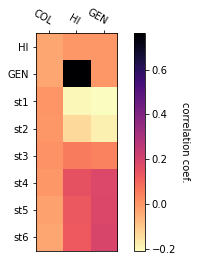

In [68]:
fig, ax = plt.subplots()
x = ['COL', 'HI', 'GEN']
y = ['HI', 'GEN', 'st1', 'st2', 'st3', 'st4', 'st5', 'st6']
im, cbar = heatmap(corr_matrix, y, x, ax=ax, cmap="magma_r", cbarlabel="correlation coef.")
texts = annotate_heatmap(im, valfmt="{:.2f}".format(corr_matrix[i, j]), size=7, threshold=20,
                 textcolors=("red", "white"))

fig.tight_layout()
plt.show()

TypeError: unhashable type: 'slice'

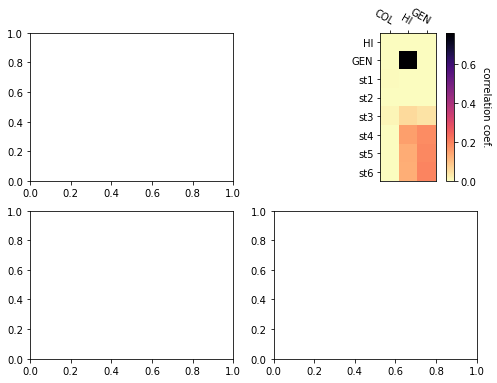

In [69]:
np.random.seed(19680801)

fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6))

# Replicate the above example with a different font size and colormap.


data = np.random.randint(2, 100, size=(7, 7))
x = ['COL', 'HI', 'GEN']
y = ['HI', 'GEN', 'st1', 'st2', 'st3', 'st4', 'st5', 'st6']
im, _ = heatmap(corr_matrix, y, x, ax=ax2, vmin=0,
                cmap="magma_r", cbarlabel="correlation coef.")
annotate_heatmap(im, valfmt="{x:d}", size=7, threshold=20,
                 textcolors=("red", "white"))

# Create some new data, give further arguments to imshow (vmin),
# use an integer format on the annotations and provide some colors.

data = np.random.randint(2, 100, size=(7, 7))
x = ['COL', 'HI', 'GEN']
y = ['HI', 'GEN', 'st1', 'st2', 'st3', 'st4', 'st5', 'st6']
im, _ = heatmap(corr_matrix, y, x, ax=ax2, vmin=0,
                cmap="magma_r", cbarlabel="correlation coef.")
annotate_heatmap(im, valfmt="{x:d}", size=7, threshold=20,
                 textcolors=("red", "white"))

# Sometimes even the data itself is categorical. Here we use a
# `matplotlib.colors.BoundaryNorm` to get the data into classes
# and use this to colorize the plot, but also to obtain the class
# labels from an array of classes.

data = np.random.randn(6, 6)
y = ["Prod. {}".format(i) for i in range(10, 70, 10)]
x = ["Cycle {}".format(i) for i in range(1, 7)]

qrates = list("ABCDEFG")
norm = matplotlib.colors.BoundaryNorm(np.linspace(-3.5, 3.5, 8), 7)
fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: qrates[::-1][norm(x)])

im, _ = heatmap(data, y, x, ax=ax3,
                cmap=plt.get_cmap("PiYG", 7), norm=norm,
                cbar_kw=dict(ticks=np.arange(-3, 4), format=fmt),
                cbarlabel=".")

annotate_heatmap(im, valfmt=fmt, size=9, fontweight="bold", threshold=-1,
                 textcolors=("red", "black"))

# We can nicely plot a correlation matrix. Since this is bound by -1 and 1,
# we use those as vmin and vmax. We may also remove leading zeros and hide
# the diagonal elements (which are all 1) by using a
# `matplotlib.ticker.FuncFormatter`.

corr_matrix = np.corrcoef(harvest)
im, _ = heatmap(corr_matrix, vegetables, vegetables, ax=ax4,
                cmap="PuOr", vmin=-1, vmax=1,
                cbarlabel=".")


def func(x, pos):
    return "{:.2f}".format(x).replace("0.", ".").replace("1.00", "")

annotate_heatmap(im, valfmt=matplotlib.ticker.FuncFormatter(func), size=7)


plt.tight_layout()
plt.show()

In [70]:
#On the standardized data
dfs.columns

Index(['Unnamed: 0', 'GENDER', 'STRATUM', 'CR_S11', 'CC_S11', 'ENG_S11',
       'CR_PRO', 'CC_PRO', 'ENG_PRO', 'COL_GRADE_AVG', 'HI_GRADE_AVG',
       'GENDER_bin'],
      dtype='object')

In [71]:
#Test correlation of two columns
from scipy import stats

#Gender_bin and HI_grade
stats.pearsonr(dfs.GENDER_bin, dfs.HI_GRADE_AVG)[0]

-0.027502007174211328

In [72]:
## For loop for each columnsxcolumn pair (without stratum)

# only get df with columns needed
dfs_use = dfs[['COL_GRADE_AVG', 'HI_GRADE_AVG','GENDER_bin']]

# 3x3 matrix
corr_matrix = np.empty((3,3))
a_array = []                  

In [73]:
a_array.append(stats.pearsonr(x, y)[0])

ValueError: x and y must have the same length.

In [74]:
for i, col1 in enumerate(dfs_use.columns):
    x = col1
    for col2 in dfs_use.columns:
        y = col2
        a_array.append(stats.pearsonr(x, y)[0])
    np.insert(corr_matrix, i, a_array, axis=0)

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

NameError: name 'sns' is not defined

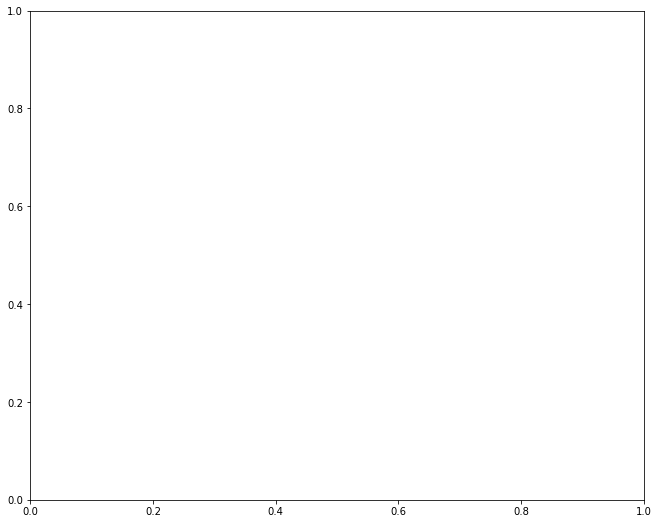

In [75]:
corr = dfs_use.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# NEW CORRELATION more attributes

Remember to NOT include SEABORN when plotting heatmap

In [84]:
from scipy.stats import pointbiserialr
from matplotlib import pyplot as plt
#import seaborn as sns
#sns.set()

In [85]:
df = pd.read_csv("df_standardized_score_extened.csv")

In [86]:
df

,Unnamed: 0,GENDER,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,WC_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin,STRATUM_Stratum_1,STRATUM_Stratum_2,STRATUM_Stratum_3,STRATUM_Stratum_4,STRATUM_Stratum_5,STRATUM_Stratum_6,SCHOOL_TYPE_ACADEMIC,SCHOOL_TYPE_TECHNICAL,SCHOOL_TYPE_TECHNICAL/ACADEMIC,SCHOOL_NAT_PRIVATE,SCHOOL_NAT_PUBLIC
0,0,F,0.562526,2.016939,0.029131,1.976314,1.412733,-0.283031,1.113281,0.407467,1.000257,0.843171,0.995599,1.371666,1.208684,-0.399596,-0.693278,-0.695317,2.620013,-0.231819,-0.183189,0.76433,-0.305418,-0.628312,0.943614,-0.943614
1,1,F,1.573167,1.418487,0.523176,3.231146,1.832378,0.863685,-0.874678,0.924854,1.196373,0.809840,0.484028,1.540112,1.208684,-0.399596,-0.693278,-0.695317,-0.381647,4.313367,-0.183189,0.76433,-0.305418,-0.628312,0.943614,-0.943614
2,2,M,-1.037656,-1.174802,-2.243479,-1.608922,-1.384905,-2.664672,-2.212033,-1.420633,-0.960904,-1.056719,-1.854585,-1.828806,-0.827279,-0.399596,1.442307,-0.695317,-0.381647,-0.231819,-0.183189,0.76433,-0.305418,-0.628312,0.943614,-0.943614
3,3,F,-0.700776,-0.576351,-0.958960,0.004434,0.783264,-0.547658,-0.983113,0.579930,0.490355,-0.190103,0.030921,-0.144347,1.208684,-0.399596,1.442307,-0.695317,-0.381647,-0.231819,-0.183189,0.76433,-0.305418,-0.628312,0.943614,-0.943614
4,4,M,1.320507,0.421068,1.511268,1.886683,2.112142,0.731371,1.149426,1.338764,1.274820,0.576520,1.507171,1.674869,-0.827279,-0.399596,-0.693278,-0.695317,2.620013,-0.231819,-0.183189,0.76433,-0.305418,-0.628312,0.943614,-0.943614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,12406,M,0.225646,0.820036,0.918413,0.273327,1.342792,0.466745,0.318097,0.924854,0.764918,0.376531,0.805587,1.236910,-0.827279,-0.399596,1.442307,-0.695317,-0.381647,-0.231819,-0.183189,0.76433,-0.305418,-0.628312,0.943614,-0.943614
12407,12407,M,-0.532335,-0.376867,0.029131,-0.085197,-0.615555,-1.385643,-0.838534,-0.523829,-2.216048,-1.790010,-1.386863,-0.413860,-0.827279,-0.399596,1.442307,-0.695317,-0.381647,-0.231819,-0.183189,0.76433,-0.305418,-0.628312,-1.059670,1.059670
12408,12408,M,0.141425,0.820036,1.412458,0.542220,-0.265850,0.907789,0.932558,1.062824,0.529578,1.109822,1.024832,0.630504,-0.827279,-0.399596,1.442307,-0.695317,-0.381647,-0.231819,-0.183189,0.76433,-0.305418,-0.628312,0.943614,-0.943614
12409,12409,F,-0.953436,0.820036,0.325558,-0.443720,-0.685496,-0.768180,0.643400,-0.282382,-2.333717,-0.390091,-0.729128,0.057788,1.208684,-0.399596,-0.693278,1.438077,-0.381647,-0.231819,-0.183189,0.76433,-0.305418,-0.628312,0.943614,-0.943614


Create correlation matrix

In [87]:
# Columns to use 
df_use = df[['COL_GRADE_AVG', 'HI_GRADE_AVG','STRATUM_Stratum_1', 'STRATUM_Stratum_2', 'STRATUM_Stratum_3',
       'STRATUM_Stratum_4', 'STRATUM_Stratum_5', 'STRATUM_Stratum_6','GENDER_bin', 'SCHOOL_NAT_PRIVATE', 
        'SCHOOL_TYPE_ACADEMIC', 'SCHOOL_TYPE_TECHNICAL', 'SCHOOL_TYPE_TECHNICAL/ACADEMIC',
       'CR_S11', 'CC_S11', 'ENG_S11',  'CR_PRO',
       'CC_PRO', 'ENG_PRO']]

# 3x6 matrix
corr_matrix = np.empty((17,11))
corr_matrix

array([[0.00000000e+000, 2.01589600e-312, 6.93356986e-310,
        1.44295714e-312, 2.01589600e-312, 1.82491638e-312,
        3.50786609e-322, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 1.54905693e-312, 1.50661701e-312,
        1.37929726e-312, 1.46417710e-312, 1.37929726e-312,
        1.50661701e-312, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 1.78247646e-312,
        1.37929726e-312, 1.80369642e-312],
       [2.01589600e-312, 2.46151512e-312, 2.05833592e-312,
        2.48273508e-312, 2.01589600e-312, 2.42092166e-322,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.78247646e-312, 1.37929726e-312,
        1.80369642e-312, 2.01589600e-312, 2.46151512e-312,
  

In [88]:
arrcor = []
for i, col1 in enumerate(df_use[['CR_PRO',
       'CC_PRO', 'ENG_PRO','SCHOOL_NAT_PRIVATE', 
        'SCHOOL_TYPE_ACADEMIC', 'SCHOOL_TYPE_TECHNICAL', 'SCHOOL_TYPE_TECHNICAL/ACADEMIC',
        'COL_GRADE_AVG', 'HI_GRADE_AVG', 'GENDER_bin',  'STRATUM_Stratum_1', 'STRATUM_Stratum_2', 'STRATUM_Stratum_3',
       'STRATUM_Stratum_4', 'STRATUM_Stratum_5', 'STRATUM_Stratum_6']]): 
    x = df_use["{}".format(col1)]
    #print(1, col1)
    a_array = []
    for col2 in df_use[['CR_S11', 'CC_S11', 'ENG_S11', 'SCHOOL_NAT_PRIVATE', 
        'SCHOOL_TYPE_ACADEMIC', 'SCHOOL_TYPE_TECHNICAL', 'SCHOOL_TYPE_TECHNICAL/ACADEMIC', 
        'COL_GRADE_AVG', 'HI_GRADE_AVG', 'GENDER_bin']]:
        y = df_use["{}".format(col2)]
        a_array.append(pointbiserialr(x, y)[0])
        #print(2, col2)
    arrcor.append(a_array)
    

In [89]:
#Create matrix:
corr_matrix = np.array(arrcor).reshape(16,10)

In [90]:
corr_matrix 

array([[ 5.89139470e-01,  5.67080693e-01,  5.01598826e-01,
         1.52484989e-01,  1.06201172e-01, -4.93949383e-02,
        -8.28071560e-02,  8.58403270e-01,  6.33947649e-01,
        -2.57371011e-02],
       [ 5.15558363e-01,  5.24206028e-01,  4.33447046e-01,
         1.35383788e-01,  9.80311413e-02, -4.82381740e-02,
        -7.49304503e-02,  8.47569550e-01,  5.61649035e-01,
        -1.74905953e-02],
       [ 5.49310527e-01,  5.11280274e-01,  7.38293719e-01,
         3.48778854e-01,  2.32400473e-01, -9.30463689e-02,
        -1.90560325e-01,  7.88188981e-01,  7.15480913e-01,
        -3.13454755e-02],
       [ 1.90370758e-01,  1.69080520e-01,  3.91477120e-01,
         1.00000000e+00,  5.50716771e-01, -1.42239500e-01,
        -5.02461487e-01,  2.49002518e-01,  3.10515575e-01,
        -1.69509739e-02],
       [ 1.35640318e-01,  1.33163430e-01,  2.73379234e-01,
         5.50716771e-01,  1.00000000e+00, -3.99588624e-01,
        -8.22042368e-01,  1.71089959e-01,  2.22898168e-01,
        -4.

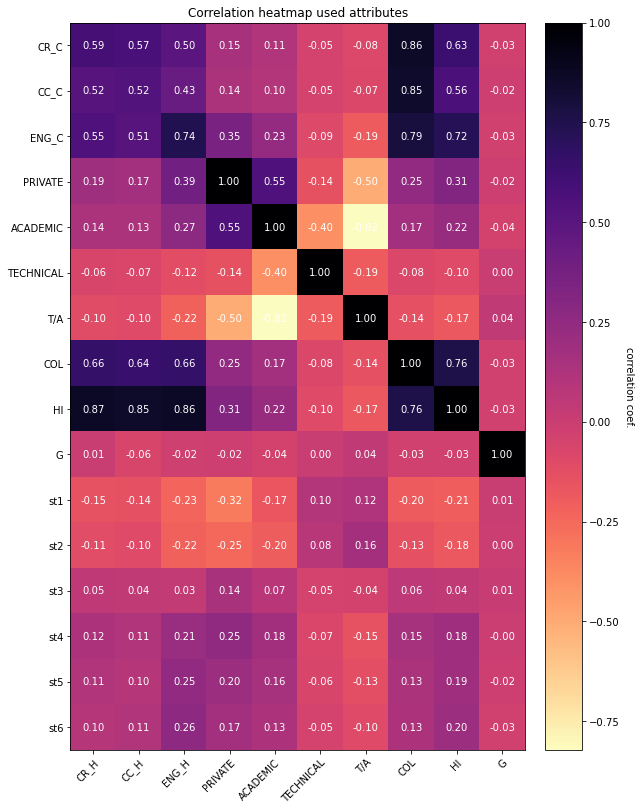

In [91]:
#plot correlation matrix
fig, ax = plt.subplots(figsize=(9, 14))
im = ax.imshow(corr_matrix,  cmap="magma_r" )

#tick labels
x_label_list = ['CR_H', 'CC_H', 'ENG_H', 'PRIVATE', 
        'ACADEMIC', 'TECHNICAL', 'T/A', 
        'COL', 'HI', 'G']
y_label_list = ['CR_C',
       'CC_C', 'ENG_C','PRIVATE', 
        'ACADEMIC', 'TECHNICAL', 'T/A',
        'COL', 'HI', 'G',  'st1', 'st2', 'st3',
       'st4', 'st5', 'st6']
# We want to show all ticks...
ax.set_xticks(np.arange(len(x_label_list)))
ax.set_yticks(np.arange(len(y_label_list)))
ax.set_xticklabels(x_label_list)
ax.set_yticklabels(y_label_list)
#ax.grid(which="minor", color="w", linestyle='-', linewidth=10)


# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(y_label_list)):
    for j in range(len(x_label_list)):
        text = ax.text(j, i, "{:.2f}".format(corr_matrix[i, j]),
                       ha="center", va="center", color="w")
        
cbar = fig.colorbar(im, ax=ax, fraction=0.0711, pad=0.04)
cbar.ax.set_ylabel("correlation coef.", rotation=-90, va="bottom")


ax.set_title("Correlation heatmap used attributes")
fig.tight_layout()
plt.show()

#### Testing correlation between socioeconomic level (sns) and socioeconomic level of the Institution of higher education

In [92]:
#correlation
df['SEL'].corr(df['SEL_IHE'])

KeyError: 'SEL'

<AxesSubplot:>

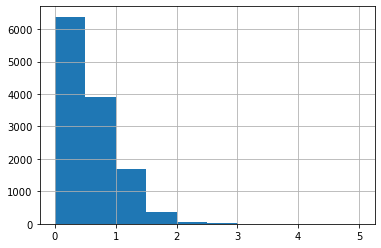

In [93]:
#plot to see which direction the people with sel goes. 
df['diff_ENG'] = abs(df['ENG_S11']-df['ENG_PRO'])
df['diff_ENG'].hist()

In [94]:
#plot to see which direction the people with sel goes. 
df['diff_SEL_SEL_IHE'] = df['SEL']-df['SEL_IHE']
df['diff_SEL_SEL_IHE'].hist()

#prøv at lave til stack

KeyError: 'SEL'

In [ ]:
df_plot = df.groupby(['diff_SEL_SEL_IHE', 'SEL']).size().reset_index().pivot(columns='SEL', index='diff_SEL_SEL_IHE', values=0)
df_plot

In [ ]:
figure(figsize=(8, 6), dpi=80)
df_plot.plot(kind='bar', stacked=True)

In [ ]:
df.SEL.value_counts()

In [ ]:
#create column with n occurences of combination, to plot a bubble chart
count_series = df.groupby(['SEL', 'SEL_IHE']).size()
df2 = count_series.to_frame(name = 'size').reset_index()
df2[:5]

In [ ]:
# Plotting bubble chart to see number of occurences for each combination
sns.scatterplot(data=df2, x="SEL", y="SEL_IHE", size="size",legend=False, sizes=(20, 2000))

### Stratum, sisben and socioeconomic level

In [ ]:
# new columns for stratum and sisben with int values
df["STRATUM"].replace({'Stratum 4':4, 'Stratum 5':5, 'Stratum 2':2, 'Stratum 6':6, 'Stratum 3':3,
       'Stratum 1':1, '0':0}, inplace=True)

df["SISBEN"].replace({'It is not classified by the SISBEN':None, 'Level 2':2, 'Level 1':1, 'Esta clasificada en otro Level del SISBEN':4, 'Level 3':3, '0':0}, inplace=True)


In [ ]:
df["STRATUM"].value_counts()

In [ ]:
df["SISBEN"].value_counts()

In [ ]:
corr_df = df[["SISBEN","STRATUM", "SEL" ]]
sns.heatmap(corr_df.corr())

In [ ]:
df["STRATUM"]